## ML Project

## Data Description

The Data Description Phase aims to preliminarily understand the structure of the data, this process will allow us to get familiarized with the data and have some first impressions of patterns and relations, errors and associated changes.

The Data Description is composed by 4 steps:
1. Data Collection - To understand the location of the data files, their format, and import them to the project.
2. Data Description - Describing the structure of the tables imported in step 1, i.e number of rows, columns, datatypes; as well as showcasing some values
3. Data Exploration - Exploring the data with some high-level aggregate statistical analysis, to have a preliminary understanding of patterns and start hypothesizing about how the attributes relate.
4. Data Quality Verification - Identifying errors in data values, such as inconsistent types, duplicate rows, and missing values



#### TASKS
1. Repetir e publicar todo o notebook (para corrigir o erro de outputs duplicados) [DONE]+  Completar a introdução do capítulo Data Description [DONE]
2. Missing Values (13 of Education)
3. Outliers (Age parece ter pessoas do século 19)
4. Descrição visual dos dados
5. Interpretação dos gráficos (Depende do passo 4.)
6. Remoção de duplicados.

### Data Collection
Libraries, data file path, and importing of the data

In [13]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [14]:
#Variables for simplifying the path of the data
currentpath = os.getcwd()
datapath = os.path.join(currentpath, "the-smith-parasite-dataset")

#Train datasets import
train_demo = pd.read_excel(datapath + "\\train_demo.xlsx")
train_habits = pd.read_excel(datapath + "\\train_habits.xlsx")
train_health = pd.read_excel(datapath + "\\train_health.xlsx")

"""
#Test datasets import
test_demo = pd.read_excel(datapath + "\\test_demo.xlsx")
test_habits = pd.read_excel(datapath + "\\test_habits.xlsx")
test_health = pd.read_excel(datapath + "\\test_health.xlsx")
"""


,PatientID,Name,Birth_Year,Region,Education,Disease
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1


,PatientID,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
0,1167,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1,1805,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
2,1557,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
3,1658,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
4,1544,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter


,PatientID,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
4,1544,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...


PatientID           800
Height              800
Weight              800
High_Cholesterol    800
Blood_Pressure      800
Mental_Health       800
Physical_Health     800
Checkup             800
Diabetes            800
dtype: int64

### Data Description
Sample displaying, merging the tables into one and description with count(), info() and describe() methods

In [3]:

display(train_demo.head())
display(train_habits.head())
display(train_health.head())

train_demo.count()
train_habits.count()
train_health.count()

train_data = train_demo.merge(train_habits, on='PatientID').merge(train_health, on='PatientID')
display(train_data)

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1909,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.
796,1386,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
797,1088,Mrs. Cheryl Harris,1860,East Midlands,Elementary School (1st to 9th grade),0,No,I consider myself a social drinker,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.
798,1662,Mr. Florencio Doherty,1975,East of England,Elementary School (1st to 9th grade),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,165,75,208,112,16,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         800 non-null    int64 
 1   Name              800 non-null    object
 2   Birth_Year        800 non-null    int64 
 3   Region            800 non-null    object
 4   Education         787 non-null    object
 5   Disease           800 non-null    int64 
 6   Smoking_Habit     800 non-null    object
 7   Drinking_Habit    800 non-null    object
 8   Exercise          800 non-null    object
 9   Fruit_Habit       800 non-null    object
 10  Water_Habit       800 non-null    object
 11  Height            800 non-null    int64 
 12  Weight            800 non-null    int64 
 13  High_Cholesterol  800 non-null    int64 
 14  Blood_Pressure    800 non-null    int64 
 15  Mental_Health     800 non-null    int64 
 16  Physical_Health   800 non-null    int64 
 17  Checkup         

In [5]:
train_data.describe().T[1:]

,count,mean,std,min,25%,50%,75%,max
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.0,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.0,1.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.0,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.0,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.0,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.0,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.0,30.0


In [6]:
train_data.describe(include='O').T

#There is one repeated name
#There are rows without Education data

,count,unique,top,freq
Name,800,799,Mr. Gary Miller,2
Region,800,10,East Midlands,154
Education,787,6,University Complete (3 or more years),239
Smoking_Habit,800,2,No,673
Drinking_Habit,800,3,I usually consume alcohol every day,406
Exercise,800,2,No,536
Fruit_Habit,800,5,Less than 1. I do not consume fruits every day.,452
Water_Habit,800,3,Between one liter and two liters,364
Checkup,800,4,More than 3 years,429
Diabetes,800,4,Neither I nor my immediate family have diabetes.,392


### Data Exploration
Correlations with data, plotting of correlations, hypothesizing.

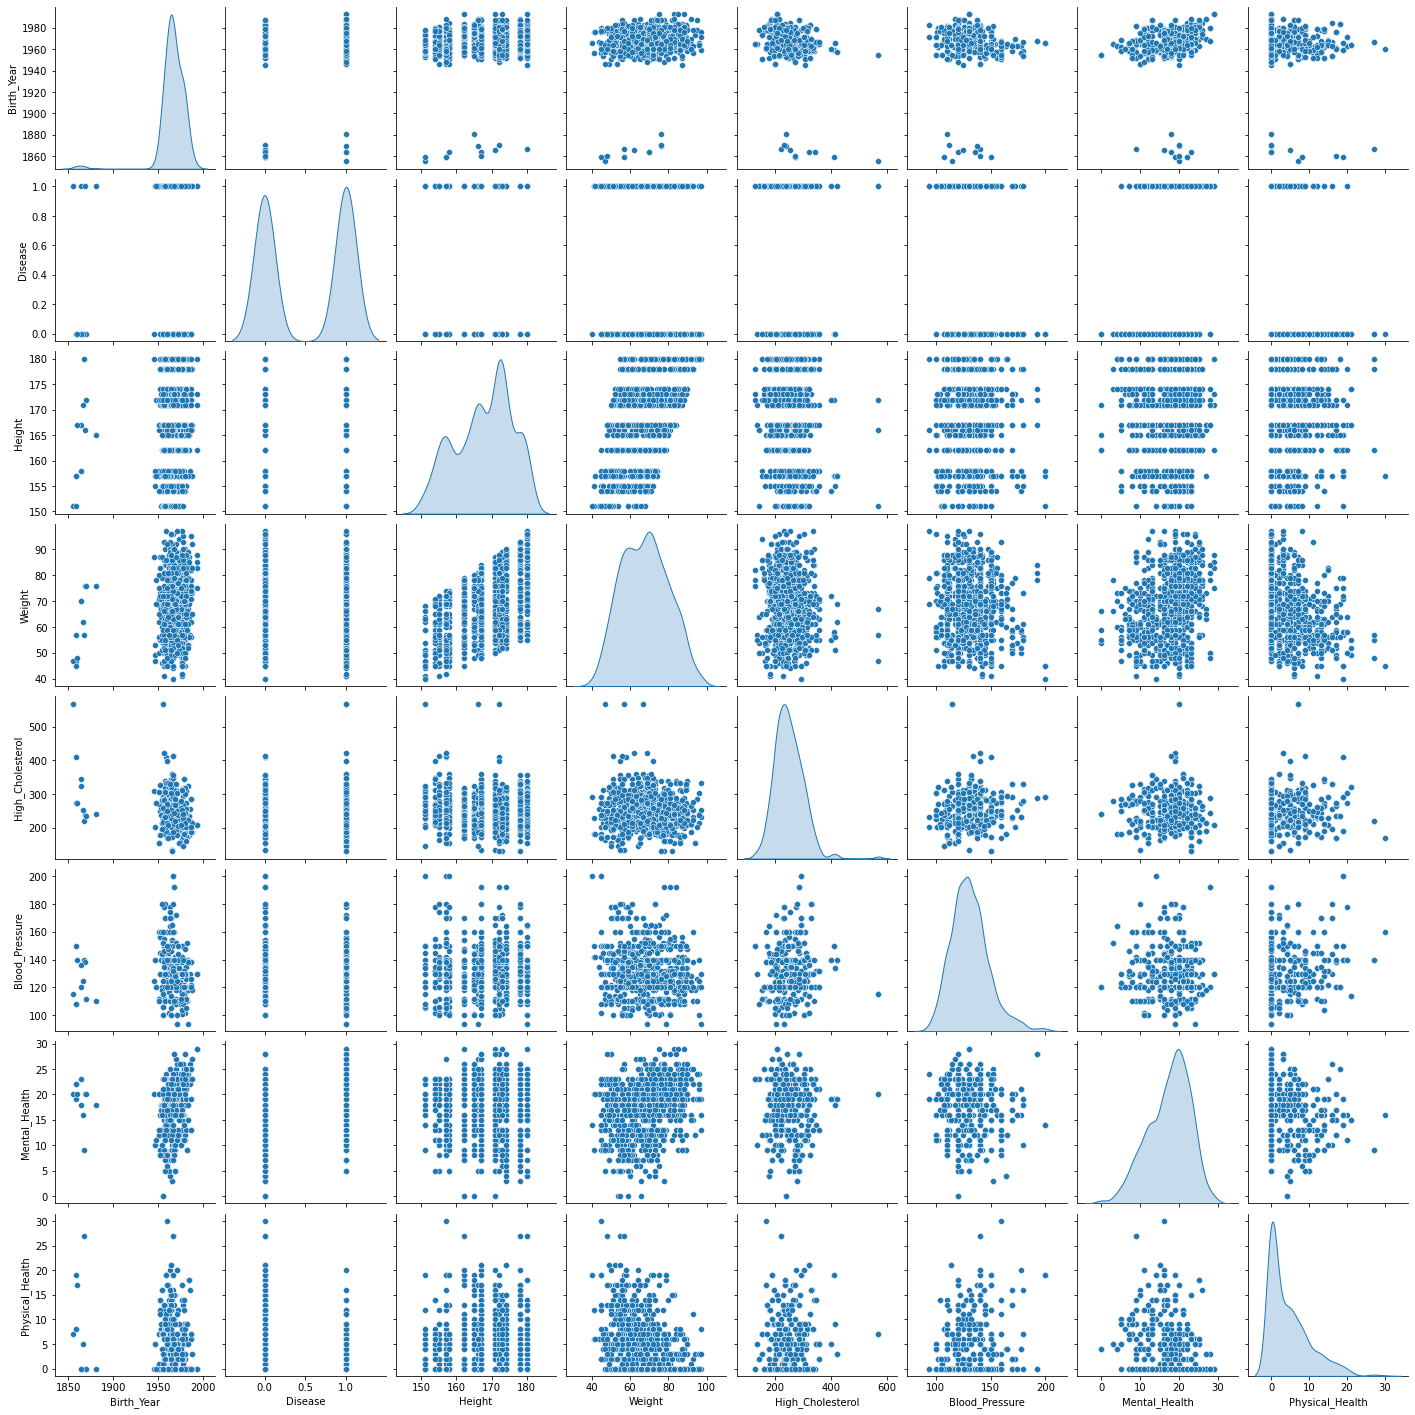

In [8]:
sns.pairplot(train_data.drop("PatientID", axis=1), diag_kind = 'kde')
plt.show()

In [9]:
cortab=train_data.drop("PatientID",axis=1).corr("spearman")

In [10]:
cortab

,Birth_Year,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
Birth_Year,1.000000,0.228399,0.066652,0.176250,-0.207905,-0.261038,0.374150,-0.231305
Disease,0.228399,1.000000,-0.152341,0.189622,-0.107731,-0.135463,0.424439,-0.435109
Height,0.066652,-0.152341,1.000000,0.482946,-0.049529,-0.013789,-0.045699,0.053507
Weight,0.176250,0.189622,0.482946,1.000000,-0.031987,-0.066730,0.326143,-0.425812
High_Cholesterol,-0.207905,-0.107731,-0.049529,-0.031987,1.000000,0.136469,-0.021753,0.032528
Blood_Pressure,-0.261038,-0.135463,-0.013789,-0.066730,0.136469,1.000000,-0.024775,0.127004
Mental_Health,0.374150,0.424439,-0.045699,0.326143,-0.021753,-0.024775,1.000000,-0.415473
Physical_Health,-0.231305,-0.435109,0.053507,-0.425812,0.032528,0.127004,-0.415473,1.000000


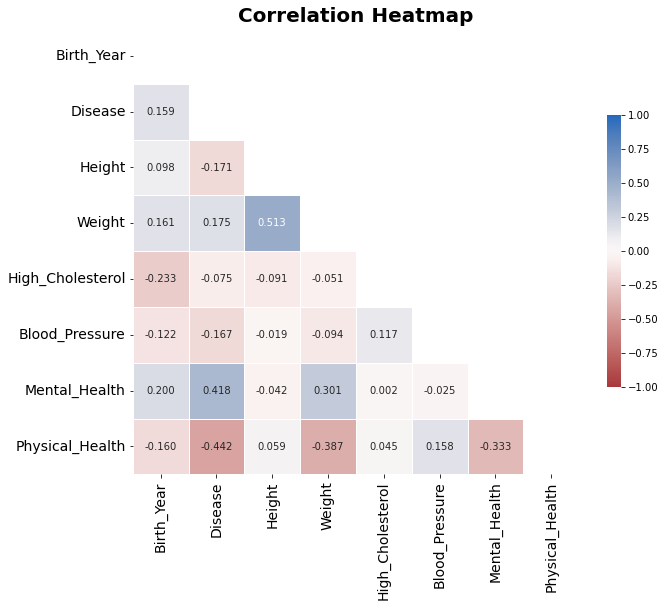

In [11]:
# Correlations analysis
# plot
cmap = sns.color_palette('vlag_r', as_cmap=True)

# Computing the correlation matrix
corr = train_data.drop("PatientID",axis=1).corr()

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize = (10, 10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True, fmt='.3f')

#customize
plt.title('Correlation Heatmap',fontsize = 20, fontweight = 'bold')


plt.show()

### Data Quality Verification
NA and Duplicate Verification

In [7]:
train_data.isna().sum()
#The only NA are from education, one solution might be to create a new category as "No Education Information", for the 13 missing values

PatientID            0
Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
dtype: int64

In [12]:
# In proportion, Educantion has only 1.6 % of NA values. 
print('\nEducation is categorical with the unique values:\n', train_data.Education.unique())
percentage = (train_data.isnull().sum()/train_data.shape[0]*100).round(1)
print('\nThe percentage of NAN values in each column is: \n',percentage)
# In proportion, Educantion has only 1.6 % of NA values. 
print('\nThe percentage of NAN values in Education is', percentage[4],',for this reason the NAN will be dropped.')

# The pros and cons associated to drop NAN values
# cons: drop causes loss of information and the analysis may be harmed due imbalance of categorical data.
# pros: is a simple way to eliminate NAN and should only be used when the incidence of NAN does not exceed 10%.
# train_data has only 1.6, for this reason the NAN will be dropped.

train_data2 = train_data.dropna(inplace = False, axis = 0)
print('\nThe percentage of NAN values in Education column after cleaning is', train_data2.isnull().sum()[4])

print('\nNumber of rows of train_data is', train_data.shape[0])
print('\nNumber of rows of train_data2, after cleaning NAN valeus is', train_data2.shape[0])


Education is categorical with the unique values:
 ['High School Incomplete (10th to 11th grade)'
 'Elementary School (1st to 9th grade)'
 'University Complete (3 or more years)'
 'University Incomplete (1 to 2 years)' nan 'High School Graduate'
 'I never attended school / Other']

The percentage of NAN values in each column is: 
 PatientID           0.0
Name                0.0
Birth_Year          0.0
Region              0.0
Education           1.6
Disease             0.0
Smoking_Habit       0.0
Drinking_Habit      0.0
Exercise            0.0
Fruit_Habit         0.0
Water_Habit         0.0
Height              0.0
Weight              0.0
High_Cholesterol    0.0
Blood_Pressure      0.0
Mental_Health       0.0
Physical_Health     0.0
Checkup             0.0
Diabetes            0.0
dtype: float64

The percentage of NAN values in Education is 1.6 ,for this reason the NAN will be dropped.

The percentage of NAN values in Education column after cleaning is 0

Number of rows of train_data is 8

In [ ]:
#FAZER AQUI A REMOçÃO DOS DUPLICADOS